In [1]:
#Imports
import numpy as np 
from NNetwork import NNetwork as nn
import networkx as nx
#import utils.NNetwork as nn
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics, model_selection
from tqdm import trange
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from src.helper_functions import display_graphs, display_dict_and_graph, display_graphs_dict_graph, motif_sample_display_list

/Users/hanbaek/Library/CloudStorage/OneDrive-Personal/PycharmProjects/embedding/src/helper_functions.py:450: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if sampling_alg is not 'RW':


In [2]:

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    #"font.size"   : 15,
    "text.usetex": True,  # use inline math for ticks
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        "\\usepackage{units}",  # load additional packages
        "\\usepackage{metalogo}",
        "\\usepackage{unicode-math}",  # unicode math setup
        r"\setmathfont{xits-math.otf}",
        r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
})

# Subgraphs induced on uniformly random k-paths

In [3]:
#ntwk_list = ['Caltech36', 'UCLA26', 'Wisconsin87', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
ntwk_list = ['Wisconsin87', 'UCLA26']
sampling_alg = 'pivot'
save_folder = 'Network_dictionary/test1/'

graph_list = []
for ntwk in ntwk_list:
    ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
    path = "Data/Facebook/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)
    print('num nodes in G', len(G.nodes()))
    print('num edges in G', len(G.get_edges()))
    

num nodes in G 23842
num edges in G 1671904
num nodes in G 20467
num edges in G 1495226


!!! X.shape (900, 100)
!!! X.shape (900, 100)


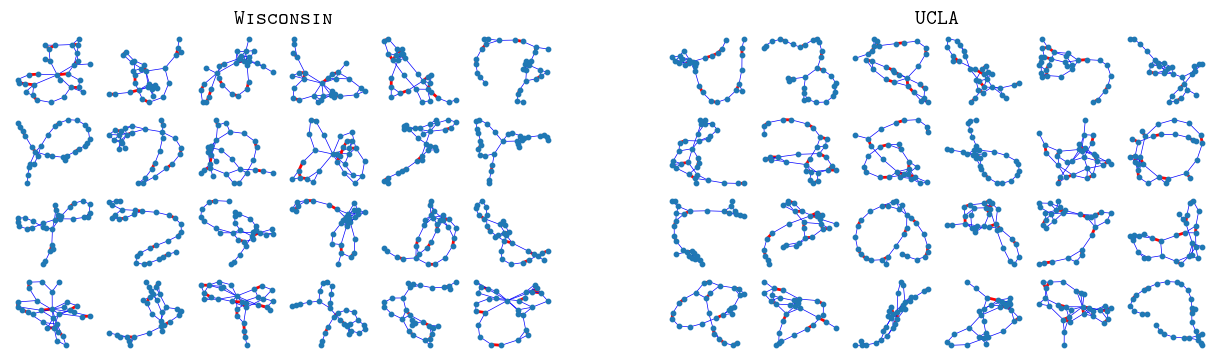

In [6]:
motif_sample_display_list(list_graphs=graph_list, k=30, 
                          #subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{Wisconsin}}$', '$\\textsc{\\texttt{ER}}$', '$\\textsc{\\texttt{BA}}$', '$\\textsc{\\texttt{WS}}$', '$\\textsc{\\texttt{SBM}}$'],
                          subtitle=['$\\textsc{\\texttt{Wisconsin}}$', '$\\textsc{\\texttt{UCLA}}$'],
                          sample_size=100, 
                          grid_shape=[4,6],
                          sampling_alg = 'RW',
                          save_path = 'Figures/subgraphs_ex2.pdf',
                          fig_size = [15,4])

In [ ]:
motif_sample_display_list(list_graphs=graph_list, k=20, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          #subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex1.pdf',
                          fig_size = [15,4])

In [ ]:
motif_sample_display_list(list_graphs=graph_list, k=30, 
                          subtitle=['$\\textsc{\\texttt{Caltech}}$', '$\\textsc{\\texttt{UCLA}}$', '$\\textsc{\\texttt{ER}}_{1}$', '$\\textsc{\\texttt{BA}}_{2}$', '$\\textsc{\\texttt{WS}}_{2}$', '$\\textsc{\\texttt{SBM}}$'],
                          sample_size=100, 
                          grid_shape=[3,2],
                          save_path = 'Network_dictionary/NDL_rev1/subgraphs_ex.pdf',
                          fig_size = [15,4])

# Plots of latent motifs

In [ ]:
path = "Network_dictionary/NDL_inj_dictionary_k_all1/full_result_UCLA26_k_21_r_25.npy"
result_dict = np.load(path, allow_pickle=True).item()
W = result_dict.get('Dictionary learned')
At = result_dict.get('Code COV learned')
k = result_dict.get('Motif size')

display_dict_and_graph(W=W, At=At, fig_size = [20,10], 
                       plot_graph_only=False,
                       save_path = "UCLA_dict_graph.png")

In [ ]:
path = "Network_dictionary/NDL_inj_dictionary_k_all1/full_result_Caltech36_k_21_r_25.npy"
result_dict = np.load(path, allow_pickle=True).item()
W = result_dict.get('Dictionary learned')
At = result_dict.get('Code COV learned')
k = result_dict.get('Motif size')

display_dict_and_graph(W=W, At=At, fig_size = [20,10], 
                       plot_graph_only=False,
                       save_path = "Caltech_dict_graph.png")

In [ ]:
path = "Network_dictionary/NDL_inj_dictionary_k_all1/full_result_COVID_PPI_k_11_r_25.npy"
result_dict = np.load(path, allow_pickle=True).item()
W = result_dict.get('Dictionary learned')
At = result_dict.get('Code COV learned')
k = result_dict.get('Motif size')

display_dict_and_graph(W=W, At=None, fig_size = [20,10], 
                       plot_graph_only=False,
                       save_path = "COVID_dict_graph_k11.png")

# Stochastic Block Model

In [ ]:
sizes = [1000, 1000, 1000]
probs = [[0.5, 0.001, 0.001], [0.001, 0.5, 0.001], [0.001, 0.001, 0.5]]
G1 = nx.stochastic_block_model(sizes, probs, seed=0)
#nx.draw_networkx(G1)
print('num nodes in G', len(G1.nodes))
print('num edges in G', len(G1.edges))

In [ ]:
path = "Data/test/SBM2.txt"
nx.write_edgelist(G1, path, data=False, delimiter=',')

In [ ]:
G = nn.NNetwork()
G.add_edges( list(G1.edges()) )

X0, embs0 = G.get_patches(k=k, sample_size=200, skip_folded_hom=True)

NDL = ndl.Network_Reconstructor(G,
                                 n_components=9,
                                 MCMC_iterations=100,
                                 sub_iterations=100,
                                 sample_size=100,
                                 batch_size=10,
                                 k1=0,
                                 k2=k,
                                 sampling_alg='pivot',
                                 if_wtd_network=False)

W0 = NDL.train_dict(skip_folded_hom=True)
At0 = NDL.At

In [ ]:
title = "SBM"
save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_path.pdf"
subtitle = 'Induced subgraphs on {}-walks'.format(k)

data = [X0, embs0, W0, At0]
display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                             title=title,
                             subtitle = subtitle,
                             save_path=save_path,
                             grid_shape_subg=[3,12],
                             grid_shape_dict=[3,3],
                             width_ratios=[4,1,1],
                             fig_size=[16.5,3],
                             show_importance=False)

# Coronavirus PPI subgraphs and latent motifs

In [ ]:
sampling_alg = 'pivot'
ntwk = 'COVID_PPI' # COVID_PPI, Wisconsin87, UCLA26, true_edgelist_for_ER_5000_mean_degree_50
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
save_folder = 'Network_dictionary/NDL_rev1/'
k=10

path = "Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
print('num nodes in G', len(G.nodes()))
print('num edges in G', len(G.get_edges()))

#mx0 = G.get_adjacency_matrix(ordered_node_list=G.nodes())
#plt.imshow(mx0)

In [ ]:
# take the largest connected component
G_nx = nx.Graph(G.get_edges())
G_nx = G_nx.subgraph(sorted(nx.connected_components(G_nx), key=len, reverse=True)[0])

In [ ]:
G0 = nx.Graph(G_nx.edges)

G0.remove_edges_from(nx.selfloop_edges(G0))

In [ ]:
G0

In [ ]:
edges = list(G0.edges)

In [ ]:
preds = nx.adamic_adar_index(G0, edges)

In [ ]:
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

In [ ]:
a = np.genfromtxt("Data/Networks_all_NDL/ca-hollywood-2009.txt", delimiter=" ", skip_header=3, dtype=int)
a.tolist()
G = nn.NNetwork()
G.add_edges(a.tolist())
print('num nodes in G', len(G.nodes()))
#print('num edges in G', len(G.get_edges()))

In [ ]:
#H = G.k_node_ind_subgraph(k=100)

X, embs = G.get_patches(k=200, sample_size=100, skip_folded_hom=False)
H = G.subgraph(nodelist=embs[-1])

In [ ]:
G1 = nx.Graph(H.get_edges())
print('edges', len(G1.edges()))
#np.savetxt("Data/Networks_all_NDL/arxiv_sub.txt", H.get_edges(), dtype="str")
H.save_wtd_edgelist(default_folder="Data/Networks_all_NDL", default_name="arxiv_sub")

In [ ]:
path = "Data/Networks_all_NDL/arxiv_sub.txt"
G2 = nn.NNetwork()
G2.load_add_edges(path, increment_weights=False, use_genfromtxt=False)

In [ ]:
Gc = max(nx.connected_components(G1), key=len)
G_conn = G1.subgraph(Gc)
print('num_nodes in max_comp of G=', len(G_conn.nodes))
print('num_edges in max_comp of G=', len(G_conn.edges))

In [ ]:
nx.diameter(G_conn)

In [ ]:
fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G_conn)
edges = G_conn.edges()
weights = [0.1 for u,v in G_conn.edges]
nx.draw(G_conn, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph')
plt.savefig("Figures/IFDS/arxiv_sub", bbox_inches="tight", transparent=True)

## MCMC motif sampling movie

In [ ]:
def plot_graph_motif(G, X, embs, path=None):
    # G = nx.Graph()
    # X = k^2 x T vectorized adjacency matrices of induced subgraphs on k-chain motifs 
    # embs = sequence of homomorphisms from k-chain motif into the network 
    pos = nx.spring_layout(G, seed=1)
    for i in trange(X.shape[1]//2, X.shape[1]):
        emb = embs[i]
        
        idx = np.arange(X.shape[1])
        A = X[:,idx[i]]
        A = X[:,idx[i]].reshape(int(np.sqrt(X.shape[0])), -1)
        H = nn.NNetwork()
        H.read_adj(A, embs[idx[i]])

        G4 = nx.Graph()
        G5 = nx.Graph()

        for u,v in G3.edges():
            G4.add_edge(u,v, color='k', weight=0.1)

        for a in np.arange(len(emb)):
            for b in np.arange(len(emb)):
                u = emb[a]
                v = emb[b]
                if H.has_edge(u,v):
                    if np.abs(a-b) == 1:
                        #print("a,b", [a,b])
                        G4.add_edge(u,v, color='r', weight=2)
                        G5.add_edge(u,v, color='r', weight=2)
                    elif not G5.has_edge(u,v):
                        G4.add_edge(u,v, color='b', weight=1)
                        G5.add_edge(u,v, color='b', weight=1)
                        
        fig = plt.figure(figsize=[15,10], constrained_layout=False)
        outer_grid = gridspec.GridSpec(nrows=2, ncols=3, wspace=0.02, hspace=0.05, width_ratios=[1.5, 1.5, 1])
        
        # Main network+motif 
        inner_grid = outer_grid[:,:2].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        edges = G4.edges()
        colors = [G4[u][v]['color'] for u,v in edges]

        weights = [1*G4[u][v]['weight'] for u,v in edges]
        nx.draw(G4, with_labels=False, node_size=20, ax=ax,
                width=weights, edge_color=colors, label='Graph', pos=pos)
        
        # Separate induced subgraph on the motif
        inner_grid = outer_grid[0,2].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        edges = G5.edges()
        colors = [G5[u][v]['color'] for u,v in edges]

        weights = [1*G5[u][v]['weight'] for u,v in edges]
        nx.draw(G5, with_labels=False, node_size=40, ax=ax,
                width=weights, edge_color=colors, label='Graph', pos=pos)
        
        # Adjaceny matrix of the sampled subgraph 
        inner_grid = outer_grid[1,2].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        ax.imshow(A)
        
        if path is not None:
            plt.savefig(path+"_"+str(i), bbox_inches="tight", transparent=False)

In [ ]:
path = "Data/Networks_all_NDL/arxiv_sub.txt"
G2 = nn.NNetwork()
G2.load_add_edges(path, increment_weights=False, use_genfromtxt=False)
G3 = nx.Graph(G2.get_edges())

print("# nodes", len(G2.nodes()))

fig = plt.figure(figsize=[10,10], constrained_layout=False)
ax = fig.add_subplot()
pos = nx.spring_layout(G3, seed=1)
edges = G3.edges()
weights = [0.1 for u,v in G3.edges]
nx.draw(G3, with_labels=False, width=weights, node_size=10, ax=ax, label='Graph', pos=pos)
plt.savefig("Figures/IFDS/arxiv_sub", bbox_inches="tight", transparent=True)

In [ ]:
#H = G.k_node_ind_subgraph(k=100)

X, embs = G2.get_patches(k=5, sample_size=100, skip_folded_hom=True, sampling_alg="pivot")
H = G2.subgraph(nodelist=embs[-1])

path = "Figures/IFDS/motif_video_5/arxiv_MCMC_ex"

plot_graph_motif(G=G3, X=X, embs=embs, path=path)

In [ ]:

def display_graphs(title,
                     save_path,
                     grid_shape=[2,3],
                     fig_size=[10,10],
                     data = None, # [X, embs]
                     show_importance=False):

        # columns of X = vectorized k x k adjacency matrices
        # corresponding list in embs = sequence of nodes (may overalp)
        X, embs = data
        print('X.shape', X.shape)

        rows = grid_shape[0]
        cols = grid_shape[1]

        fig = plt.figure(figsize=fig_size, constrained_layout=False)
        # make outer gridspec

        idx = np.arange(X.shape[1])
        outer_grid = gridspec.GridSpec(nrows=rows, ncols=cols, wspace=0.02, hspace=0.05)

        # make nested gridspecs
        for i in range(rows * cols):
            emb = embs[idx[i]]

            a = i // cols
            b = i % cols

            Ndict_wspace = 0.05
            Ndict_hspace = 0.05

            # display graphs
            inner_grid = outer_grid[i].subgridspec(1, 1, wspace=Ndict_wspace, hspace=Ndict_hspace)

            # get rid of duplicate nodes
            A = X[:,idx[i]]
            A = X[:,idx[i]].reshape(int(np.sqrt(X.shape[0])), -1)
            H = nn.NNetwork()
            H.read_adj(A, embs[idx[i]])
            A_sub = H.get_adjacency_matrix()

            # read in as a nx graph for plotting

            G1 = nx.Graph()
            for a in np.arange(len(emb)):
                G1.add_node(emb[a])

            for a in np.arange(len(emb)):
                for b in np.arange(len(emb)):
                    u = emb[a]
                    v = emb[b]

                    if H.has_edge(u,v):
                        if np.abs(a-b) == 1:
                            G1.add_edge(u,v, color='r', weight=2)
                        else:
                            G1.add_edge(u,v, color='b', weight=0.5)


            ax = fig.add_subplot(inner_grid[0, 0])
            pos = nx.spring_layout(G1)
            edges = G1.edges()
            colors = [G1[u][v]['color'] for u,v in edges]

            weights = [10*G1[u][v]['weight'] for u,v in edges]
            nx.draw(G1, with_labels=False, node_size=20, ax=ax,
                    width=weights, edge_color=colors, label='Graph')

            ax.set_xticks([])
            ax.set_yticks([])

        plt.suptitle(title, fontsize=15)
        fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0)
        fig.savefig(save_path, bbox_inches='tight')

In [ ]:
skip_folded_hom = True # k-path sampling

title = str(ntwk_nonumber)
save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_path0.png"
subtitle = 'Induced subgraphs on {}-paths'.format(k)

# get subgraphs 
X0, embs0 = G.get_patches(k=k, sample_size=100, skip_folded_hom=skip_folded_hom)

# get latent motif 
NDL = ndl.Network_Reconstructor(G,
                                 n_components=9,
                                 MCMC_iterations=100,
                                 sub_iterations=100,
                                 sample_size=100,
                                 batch_size=10,
                                 k1=0,
                                 k2=k,
                                 sampling_alg='pivot',
                                 if_wtd_network=False)

W0 = NDL.train_dict(skip_folded_hom=skip_folded_hom)
At0 = NDL.At

data = [X0, embs0, W0, At0]
display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                             title=title,
                             subtitle = subtitle,
                             save_path=save_path,
                             grid_shape_subg=[3,12],
                             grid_shape_dict=[3,3],
                             width_ratios=[4,1,1],
                             fig_size=[16.5,3],
                             show_importance=False)

In [ ]:
skip_folded_hom = False # k-walk sampling

title = str(ntwk_nonumber)
save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_path0.png"
subtitle = 'Induced subgraphs on {}-paths'.format(k)

# get subgraphs 
X0, embs0 = G.get_patches(k=k, sample_size=100, skip_folded_hom=skip_folded_hom)

# get latent motif 
NDL = ndl.Network_Reconstructor(G,
                                 n_components=9,
                                 MCMC_iterations=100,
                                 sub_iterations=100,
                                 sample_size=100,
                                 batch_size=10,
                                 k1=0,
                                 k2=k,
                                 sampling_alg='pivot',
                                 if_wtd_network=False)

W0 = NDL.train_dict(skip_folded_hom=skip_folded_hom)
At0 = NDL.At

data = [X0, embs0, W0, At0]
display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                             title=title,
                             subtitle = subtitle,
                             save_path=save_path,
                             grid_shape_subg=[3,12],
                             grid_shape_dict=[3,3],
                             width_ratios=[4,1,1],
                             fig_size=[16.5,3],
                             show_importance=False)

In [ ]:
list_network_files = [#'Caltech36.txt',
                      #'MIT8.txt',
                      #'UCLA26.txt',
                      #'Harvard1.txt',
                      #'COVID_PPI.txt',
                      #'facebook_combined.txt',
                      #'arxiv.txt',
                      #'node2vec_homosapiens_PPI.txt',
                      'true_edgelist_for_ER_5000_mean_degree_50.txt',
                      #'true_edgelist_for_ER_5000_mean_degree_100.txt',
                      #'true_edgelist_for_SW_5000_k_50_p_0.05.txt',
                      #'true_edgelist_for_SW_5000_k_50_p_0.1.txt',
                      #'true_edgelist_for_BA_5000_m_25.txt',
                      #'true_edgelist_for_BA_5000_m_50.txt',
                      ]

for ntwk in list_network_files:
    sampling_alg = 'pivot'
    #ntwk = 'true_edgelist_for_ER_5000_mean_degree_100' # COVID_PPI, Wisconsin87, UCLA26
    ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
    ntwk_nonumber = ntwk_nonumber.replace('.txt',"")
    print('ntwk_nonumber', ntwk_nonumber)
    save_folder = 'Network_dictionary/NDL_rev1/'

    path = "Data/Networks_all_NDL/" + str(ntwk) 
    
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    print('num nodes in G', len(G.nodes()))
    print('num edges in G', len(G.get_edges()))

    #mx0 = G.get_adjacency_matrix(ordered_node_list=G.nodes())
    #plt.imshow(mx0)


    ######################

    skip_folded_hom = False
    k = 20

    X0, embs0 = G.get_patches(k=k, sample_size=200, skip_folded_hom=skip_folded_hom)

    NDL = ndl.Network_Reconstructor(G,
                                     n_components=12,
                                     MCMC_iterations=100,
                                     sub_iterations=100,
                                     sample_size=100,
                                     batch_size=10,
                                     k1=0,
                                     k2=k,
                                     sampling_alg='pivot',
                                     if_wtd_network=False)

    W0 = NDL.train_dict(skip_folded_hom=skip_folded_hom)
    At0 = NDL.At

    title = str(ntwk_nonumber)
    save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_walk.png"
    subtitle = 'induced subgraphs on {}-walks'.format(k)

    data = [X0, embs0, W0, At0]
    display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                                 title=title,
                                 subtitle = subtitle,
                                 save_path=save_path,
                                 grid_shape_subg=[5,14],
                                 grid_shape_dict=[4,3],
                                 width_ratios=[4,1,1],
                                 fig_size=[16.5,4],
                                 show_importance=False)



    ######################

    skip_folded_hom = True

    X1, embs1 = G.get_patches(k=k, sample_size=200, skip_folded_hom=skip_folded_hom)

    NDL1 = ndl.Network_Reconstructor(G,
                                     n_components=12,
                                     MCMC_iterations=100,
                                     sub_iterations=100,
                                     sample_size=100,
                                     batch_size=10,
                                     k1=0,
                                     k2=k,
                                     sampling_alg='pivot',
                                     if_wtd_network=False)

    W1 = NDL.train_dict(skip_folded_hom=skip_folded_hom)
    At1 = NDL1.At


    title = str(ntwk_nonumber)
    save_path = save_folder + ntwk_nonumber + "_subgraphs_dict" + "_path.png"
    subtitle = 'induced subgraphs on {}-paths'.format(k)

    data = [X1, embs1, W1, At1]
    display_graphs_dict_graph(data=data, #[X, embs, W, At] = [subgraph patches, embeddings, dictionary, code]
                                 title=title,
                                 subtitle = subtitle,
                                 save_path=save_path,
                                 grid_shape_subg=[5,14],
                                 grid_shape_dict=[4,3],
                                 width_ratios=[4,1,1],
                                 fig_size=[16.5,4],
                                 show_importance=False)
                      

# Read off saved dictionary files and display

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
mypath = "Network_dictionary/NDL_inj_dictionary_k_all1"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
path = mypath + "/" + onlyfiles[0]
result_dict = np.load(path, allow_pickle=True).item()

In [ ]:
save_folder = "Network_dictionary/test1/"

for i in range(len(onlyfiles)):
    path = mypath + "/" + onlyfiles[i]
    result_dict = np.load(path, allow_pickle=True).item()
    ntwk_nonpy = onlyfiles[i].replace('.npy', "")
    ntwk = result_dict.get('Network name')
    ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
    ntwk_nonumber = ntwk_nonumber.replace('.txt',"")
    print('ntwk_nonpy', ntwk_nonpy)
    
    W0 = result_dict.get("Dictionary learned")
    At0 = result_dict.get("Code COV learned")
    
    NDL1 = ndl.Network_Reconstructor(G=nn.NNetwork(),
                                 n_components=W0.shape[1],
                                 k2=result_dict.get("Motif size")
                                    )
    
    NDL1.W = result_dict.get("Dictionary learned")
    NDL1.At = result_dict.get("Code COV learned")
    

    title = str(ntwk_nonumber)
    save_path = save_folder + ntwk_nonpy + "_subgraphs_dict" + ".png"
    subtitle = 'induced subgraphs on {}-paths'.format(k)
    
    NDL1.display_dict_and_graph(title=title,
                                 save_path=save_path,
                                 grid_shape=None,
                                 fig_size=[20,10])



# Subgraphs & latent motifs community sizes box plot

In [ ]:
list_network_files0 = [#'COVID_PPI.txt',
                      'facebook_combined.txt',
                      'arxiv.txt',
                      'node2vec_homosapiens_PPI.txt']

list_network_files1 = ['Caltech36.txt',
                      'MIT8.txt',
                      'UCLA26.txt',
                      'Harvard1.txt']


list_network_files2 = ['true_edgelist_for_ER_5000_mean_degree_50.txt',
                      'true_edgelist_for_ER_5000_mean_degree_100.txt']


list_network_files3 = ['true_edgelist_for_SW_5000_k_50_p_0.05.txt',
                      'true_edgelist_for_SW_5000_k_50_p_0.1.txt',
                      'true_edgelist_for_BA_5000_m_25.txt',
                      'true_edgelist_for_BA_5000_m_50.txt']

list_network_files4 = ['SBM1.txt']

ntwk_list = list_network_files0 + list_network_files1 + list_network_files2 + list_network_files3 + list_network_files4
    

## Get box plot from saved data

In [ ]:
subgraphs_community_list0, latentmotifs_community_list0 = np.load("Network_dictionary/NDL_rev1/community_data.npy", allow_pickle=True)
subgraphs_community_list1, latentmotifs_community_list1 = np.load("Network_dictionary/NDL_rev1/community_data_synth.npy", allow_pickle=True)
subgraphs_community_list2, latentmotifs_community_list2 = np.load("Network_dictionary/NDL_rev1/community_data_SBM.npy", allow_pickle=True)
subgraphs_community_list3, latentmotifs_community_list3 = np.load("Network_dictionary/NDL_rev1/community_data_SBM2.npy", allow_pickle=True)

subgraphs_community_list = list(subgraphs_community_list0) + list(subgraphs_community_list1)+list(subgraphs_community_list2)+list(subgraphs_community_list3)
latentmotifs_community_list = list(latentmotifs_community_list0) + list(latentmotifs_community_list1)+list(latentmotifs_community_list2)+list(latentmotifs_community_list3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
#data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

data_a = subgraphs_community_list
data_b = latentmotifs_community_list


ticks = ['$\\textsc{\\texttt{SNAP FB}}$',
                '$\\textsc{\\texttt{arXiv}}$',
                '$\\textsc{\\texttt{H. Sapiens}}$',
                '$\\textsc{\\texttt{Caltech}}$', 
                '$\\textsc{\\texttt{MIT}}$', 
                '$\\textsc{\\texttt{UCLA}}$', 
                '$\\textsc{\\texttt{Harvard}}$', 
                '$\\textsc{\\texttt{ER}}_{1}$', 
                '$\\textsc{\\texttt{ER}}_{2}$', 
                '$\\textsc{\\texttt{WS}}_{1}$',
                '$\\textsc{\\texttt{WS}}_{2}$',
                '$\\textsc{\\texttt{BA}}_{1}$',
                '$\\textsc{\\texttt{BA}}_{2}$',
                '$\\textsc{\\texttt{SBM}}_{1}$',
                '$\\textsc{\\texttt{SBM}}_{2}$']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=[13,5])

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='r+', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='b+', widths=0.6)
set_box_color(bpl, 'r') # colors are from http://colorbrewer2.org/
set_box_color(bpr, 'b')



# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='r', label='subgraphs')
plt.plot([], c='b', label='latent motifs')
plt.legend(fontsize=12)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=11.5)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 22)
plt.ylabel('community size', fontsize=13)
plt.tight_layout()
plt.savefig('boxcompare.pdf')

## Compute subgraph community stats from scratch

In [ ]:
from helper_functions.helper_functions import compute_community_stats

subgraphs_community_list, latentmotifs_community_list = compute_community_stats(ntwk_list, 
                                                                                k=10, 
                                                                                num_subgraphs=50,
                                                                                save_path="Network_dictionary/test1/community_data_COVID")